In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Load the data
df_host = pd.read_parquet("footprinter-5c-data.parquet")

df_host

# Convert timestamp to datetime
df_host['timestamp'] = pd.to_datetime(df_host['timestamp'], unit='ms')

# Aggregate carbon emission data, summing up the values for each hour
emissions = df_host.groupby(pd.Grouper(key='timestamp', freq='h'))['carbon_emission'].sum()

([<matplotlib.axis.YTick at 0x169ec4390>,
 [Text(0, 0, '0'), Text(0, 2500, '2500'), Text(0, 5000, '5000')])

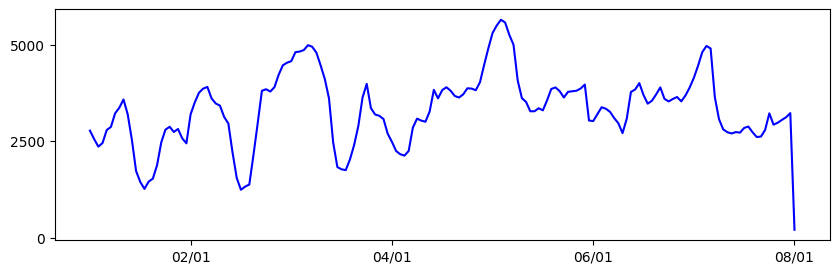

In [4]:
# Set the figure and plot
plt.figure(figsize=(10, 3))
plt.plot(emissions.index, emissions.values, label='Carbon emission (gCO2/h)', color='blue')

# Set x-axis major ticks to specific dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Every two days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  # Format as day/month

# Set y-axis ticks from 0 to 5000 with step 2500
plt.yticks(range(0, 7000, 2500))

In [ ]:
-# Include grid, labels, title, and legend
plt.grid(True)
plt.xlabel('Time (h)')
plt.ylabel('Carbon emission (gCO2/h)')
plt.title('Carbon Emission Over Time')
plt.legend()

# Force y-axis to start at 0
plt.ylim(bottom=0)

plt.show()